<a href="https://colab.research.google.com/github/Priyuuuuu/Breast-Cancer-Prediction/blob/main/Task2_Breast_cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# dropping 'Unnamed: 32' column.
df.drop("Unnamed: 32", axis=1, inplace=True)

In [ ]:
# dropping id column
df.drop('id',axis=1, inplace=True)

In [ ]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Data Visualisation

<Axes: xlabel='diagnosis', ylabel='count'>

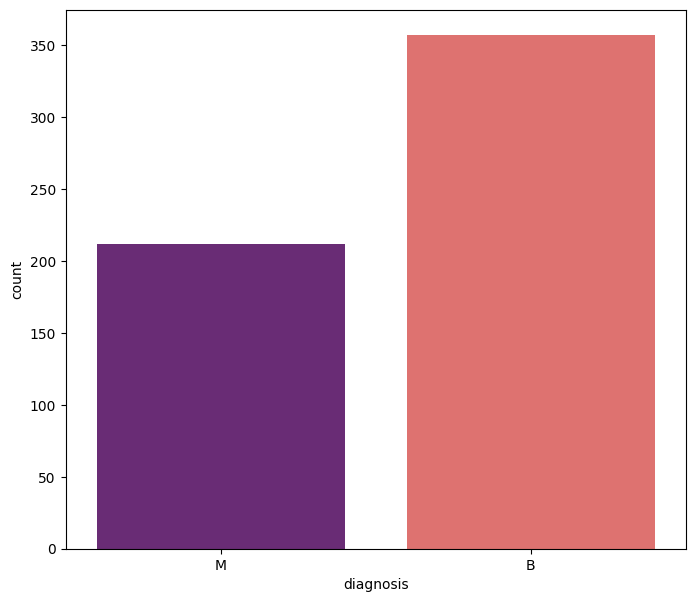

In [ ]:
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df, palette='magma')

<ipython-input-14-9bfbfd45d8dc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="Purples")


<Axes: >

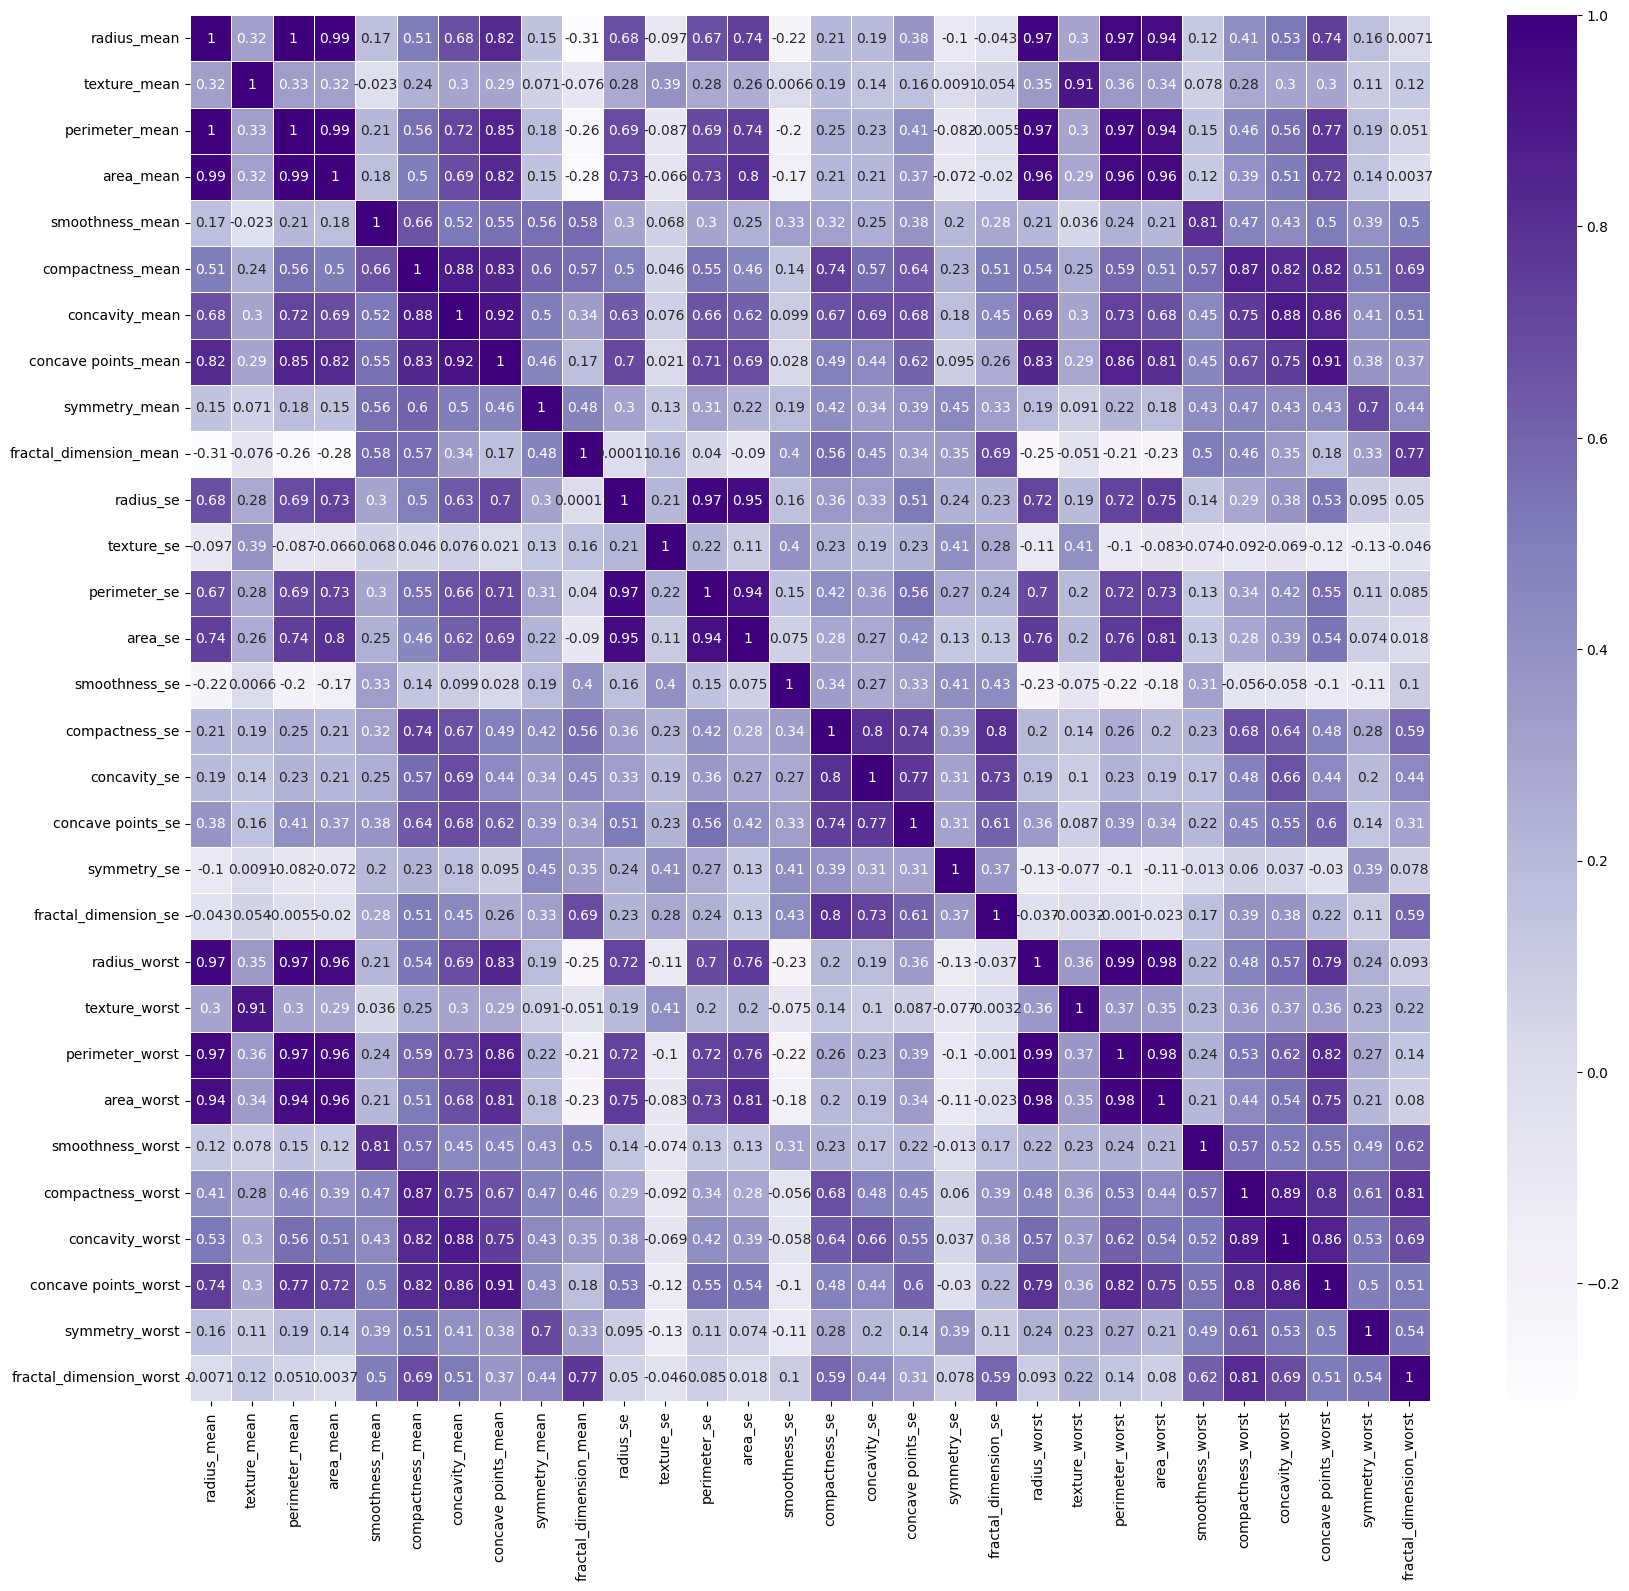

In [ ]:
# heatmap
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="Purples")

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

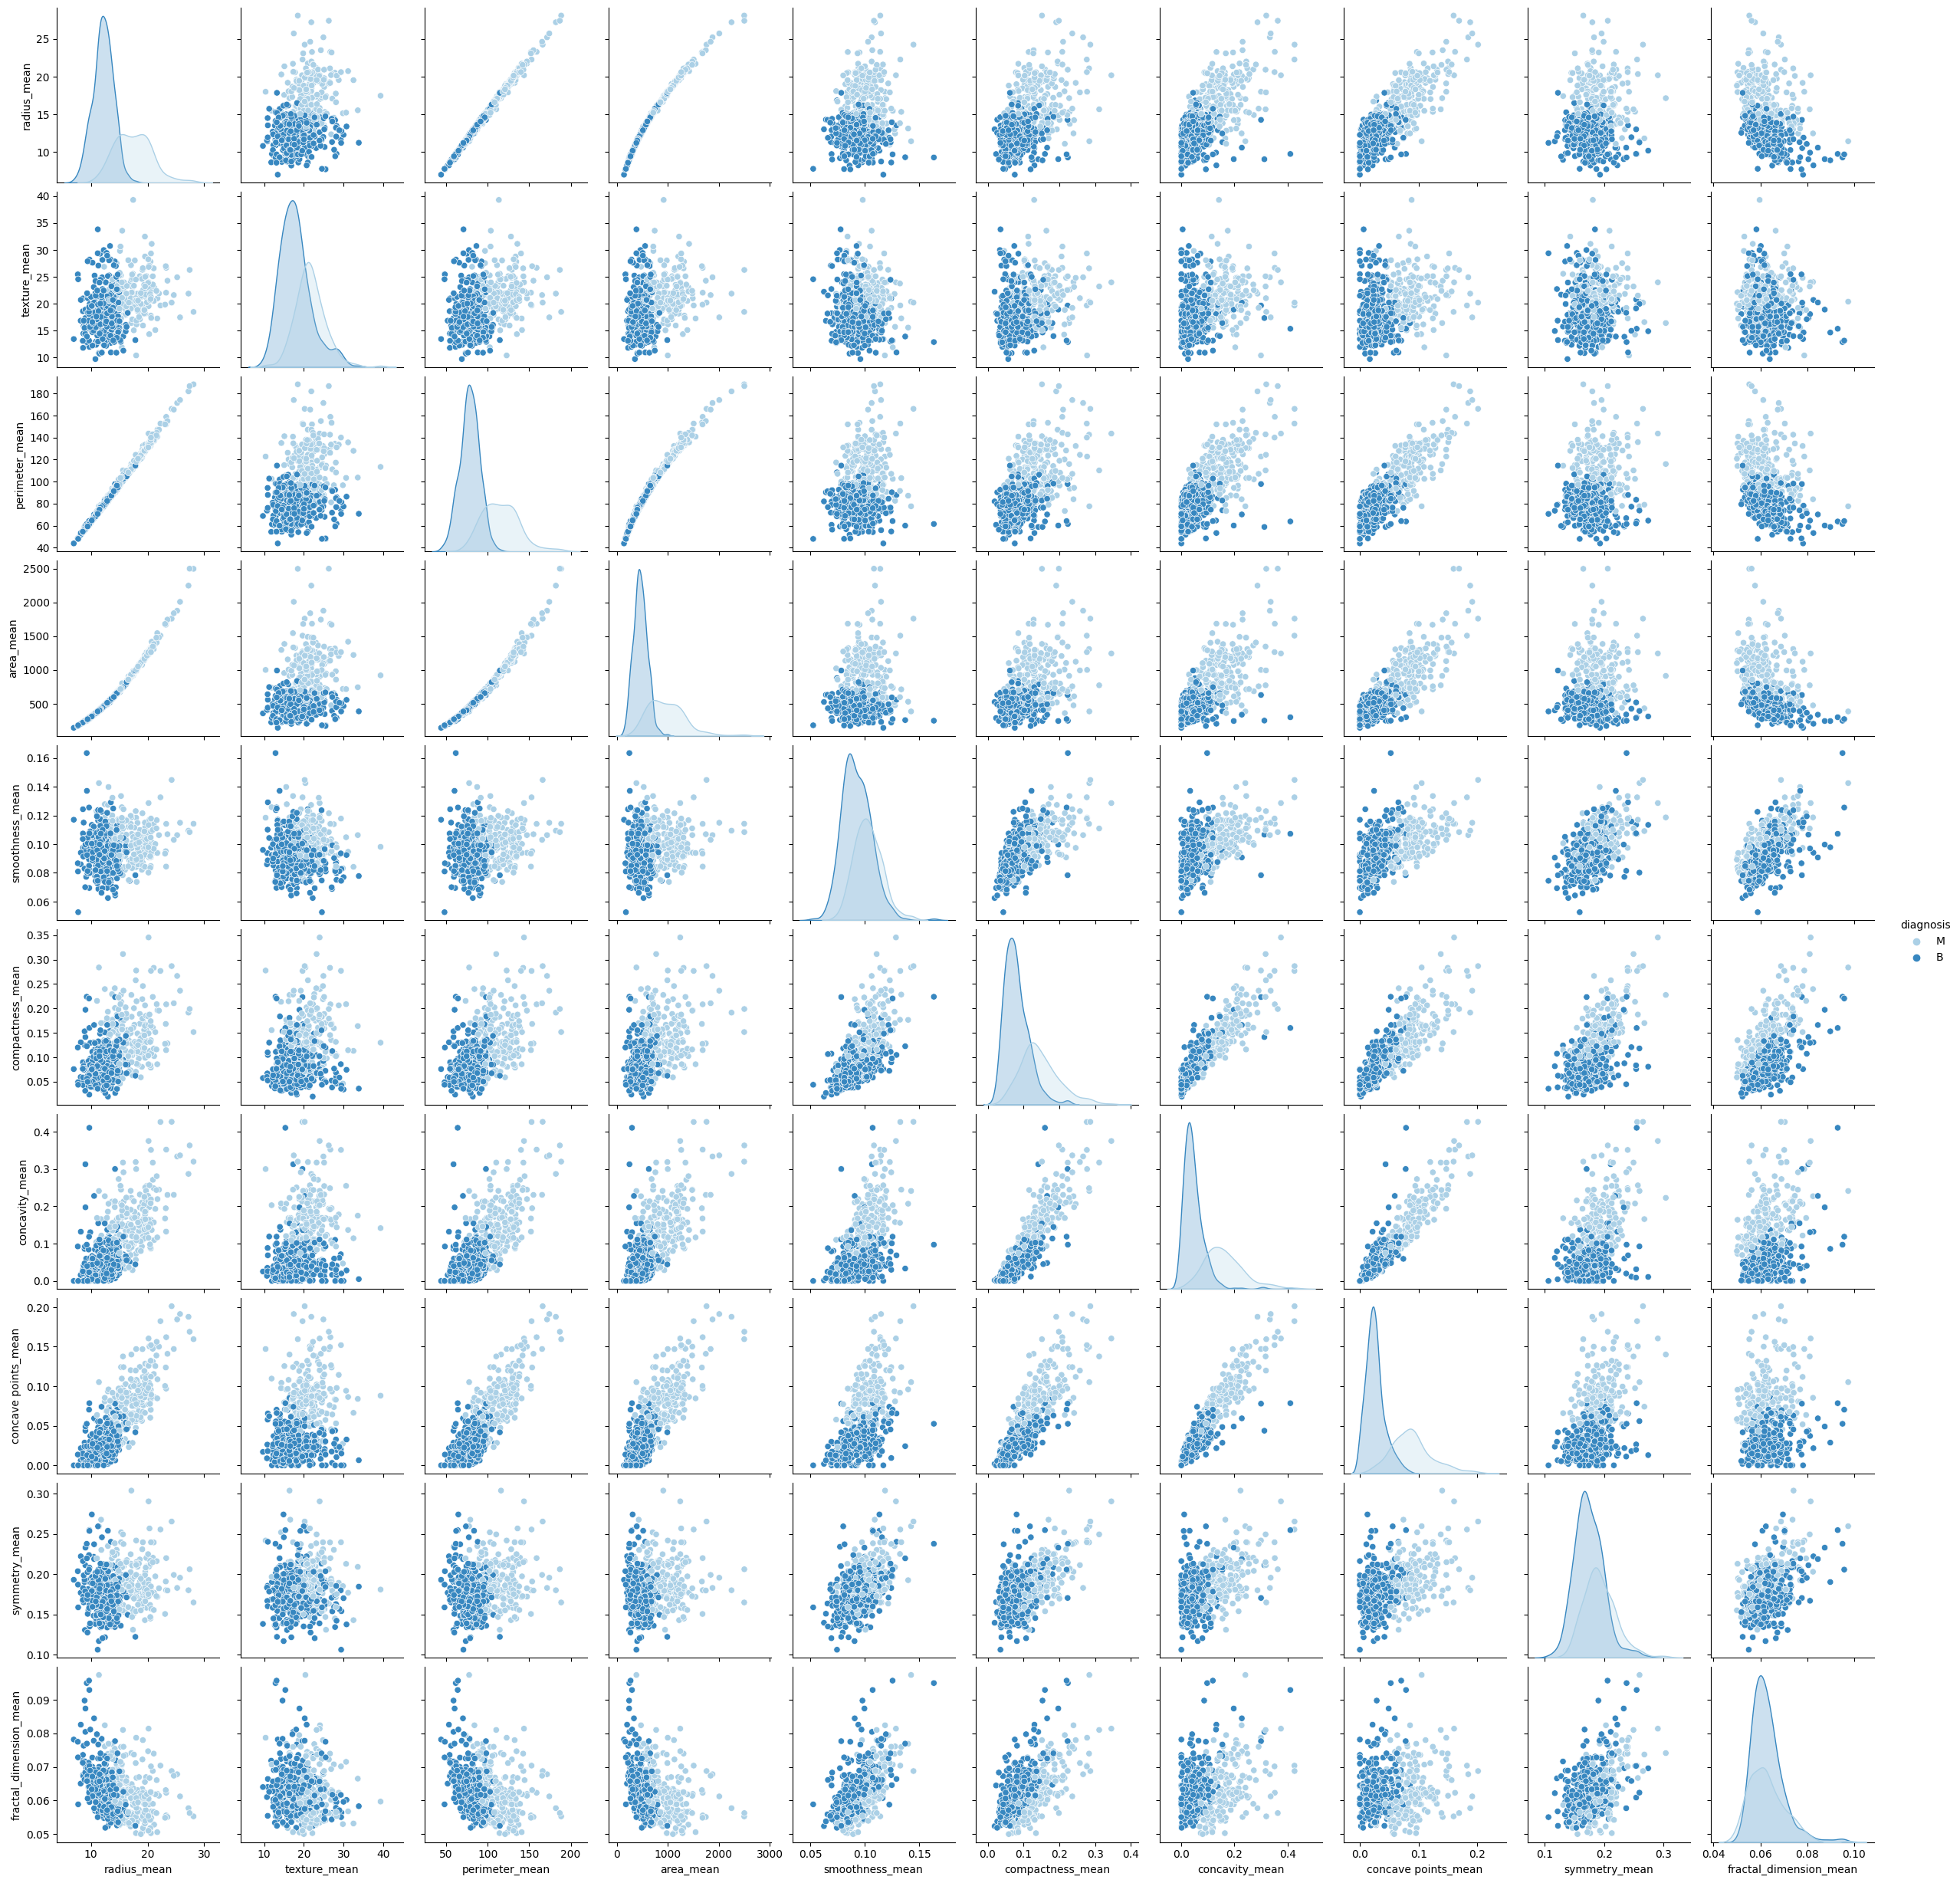

In [ ]:
# pairplot for mean columns
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Blues')

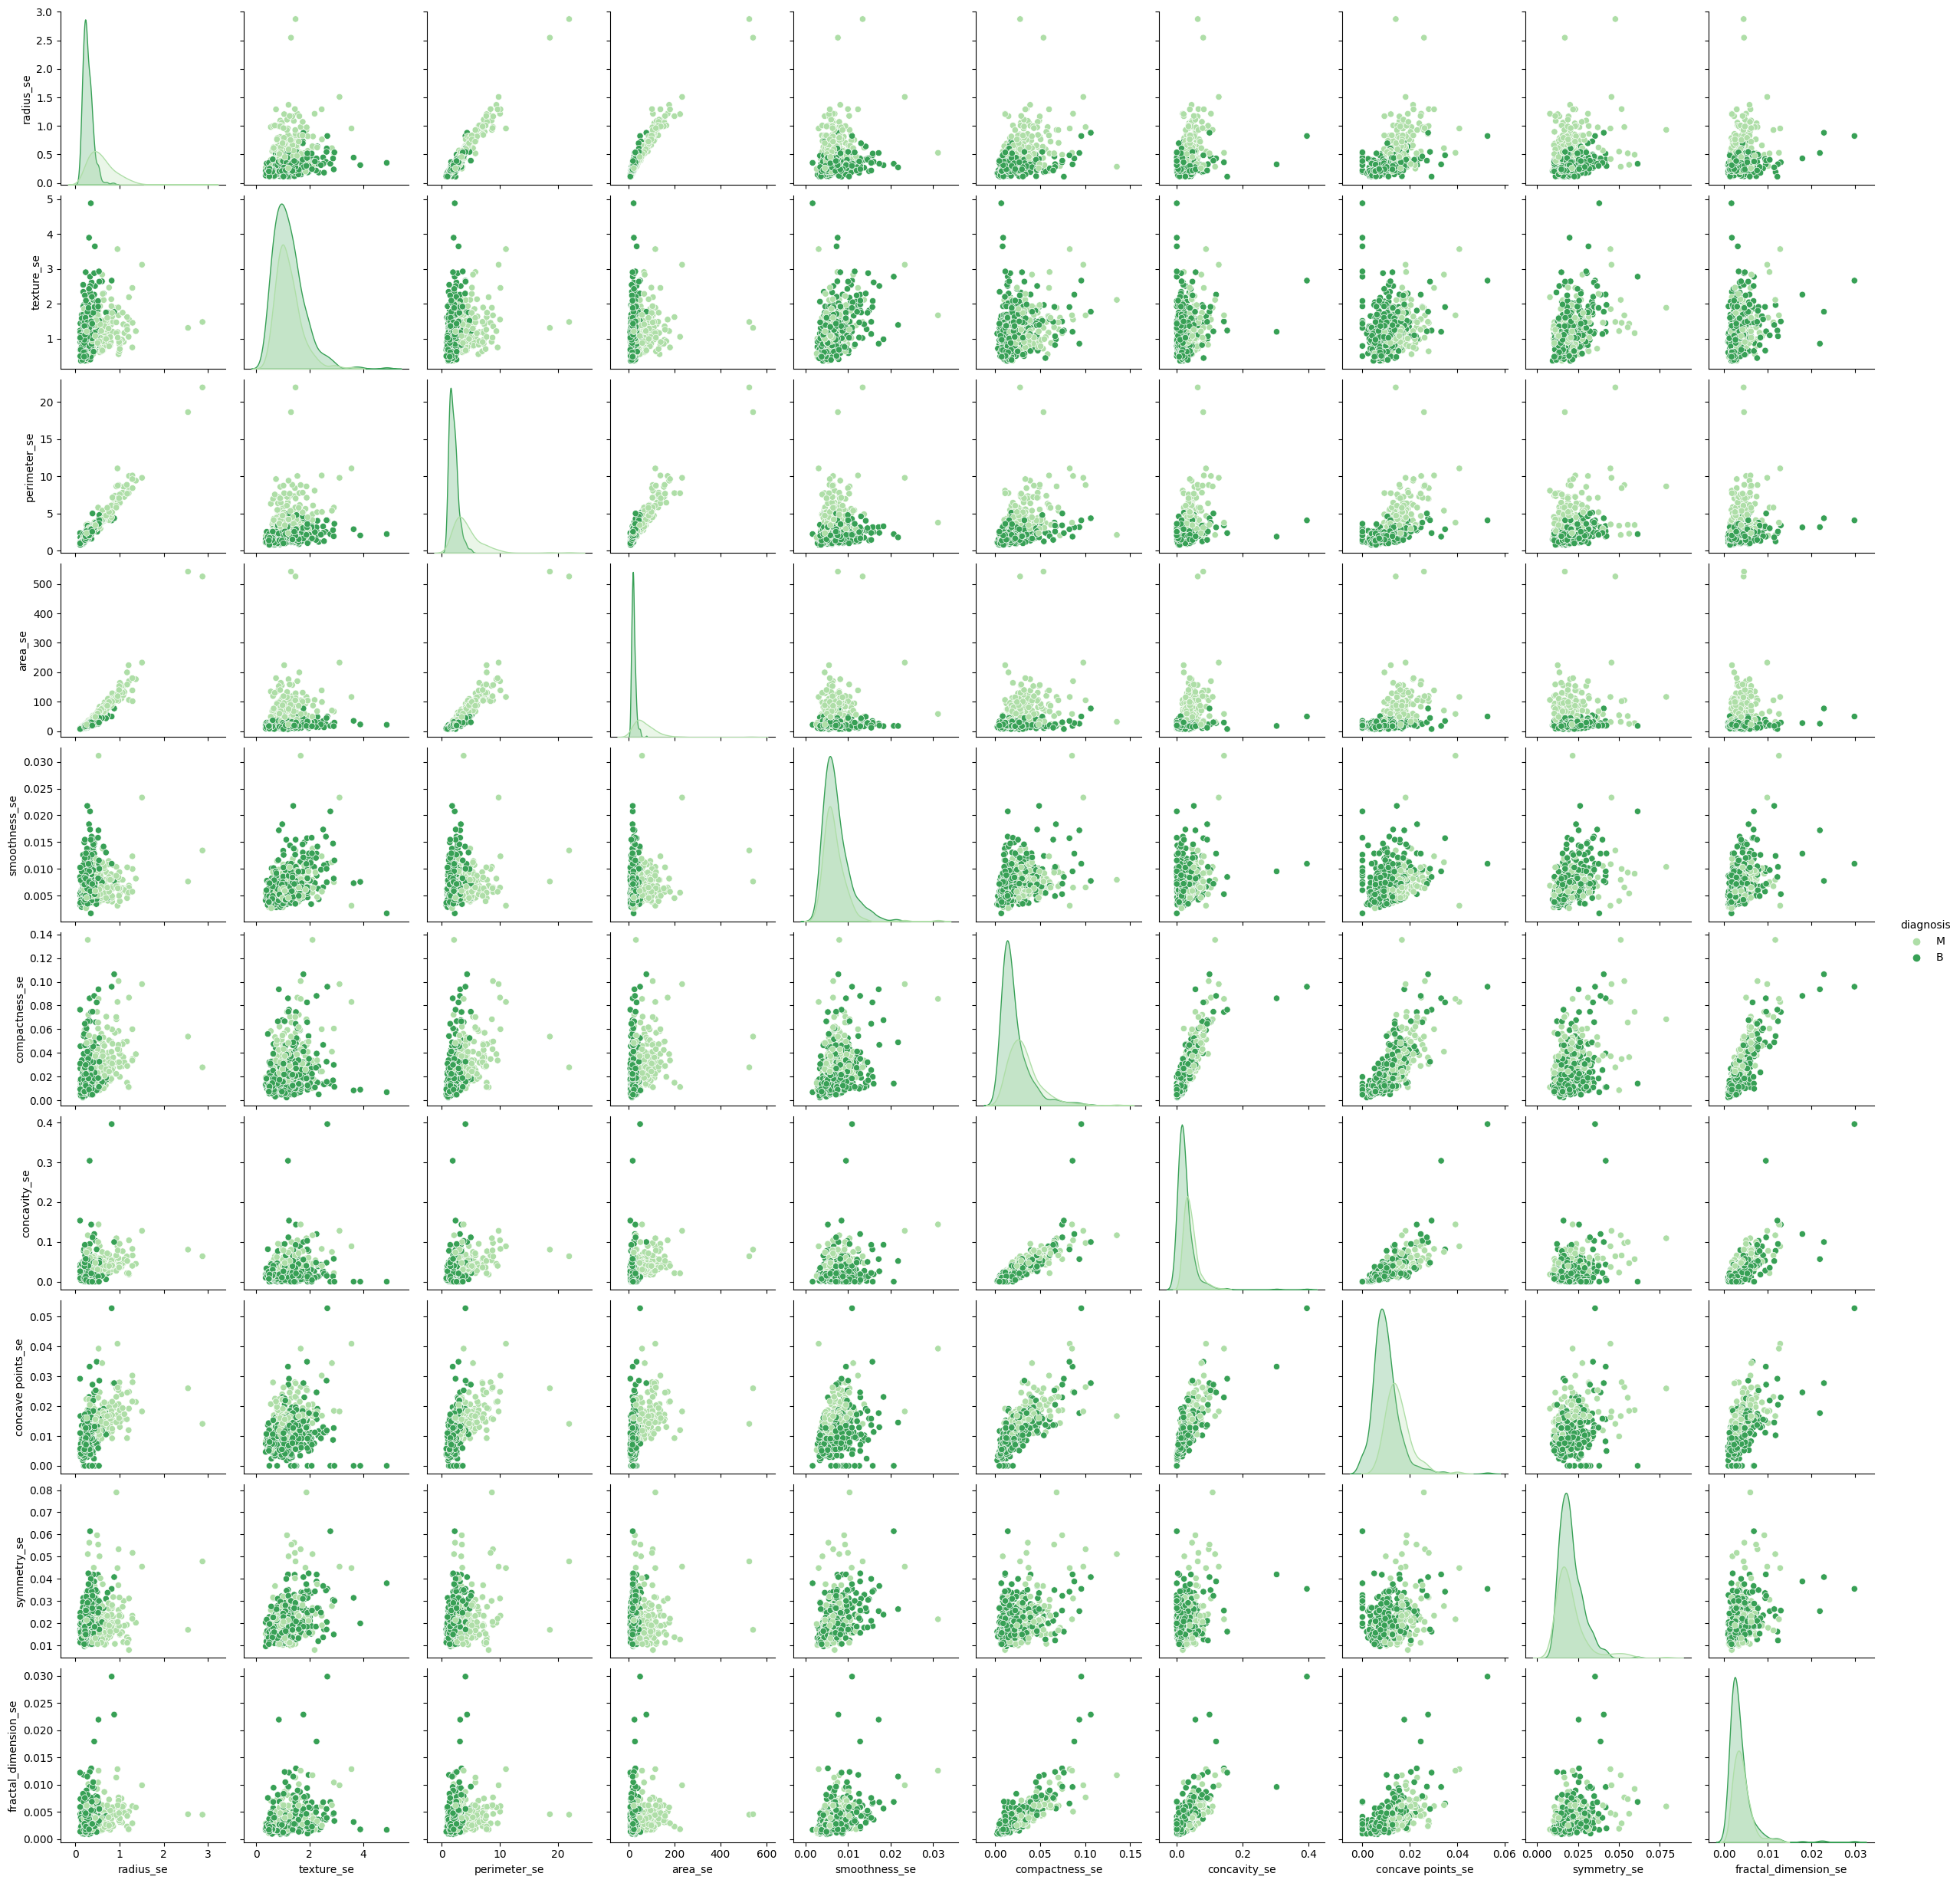

In [ ]:
# pairplot for se columns
sns.pairplot(df[s_col],hue = 'diagnosis', palette='Greens')

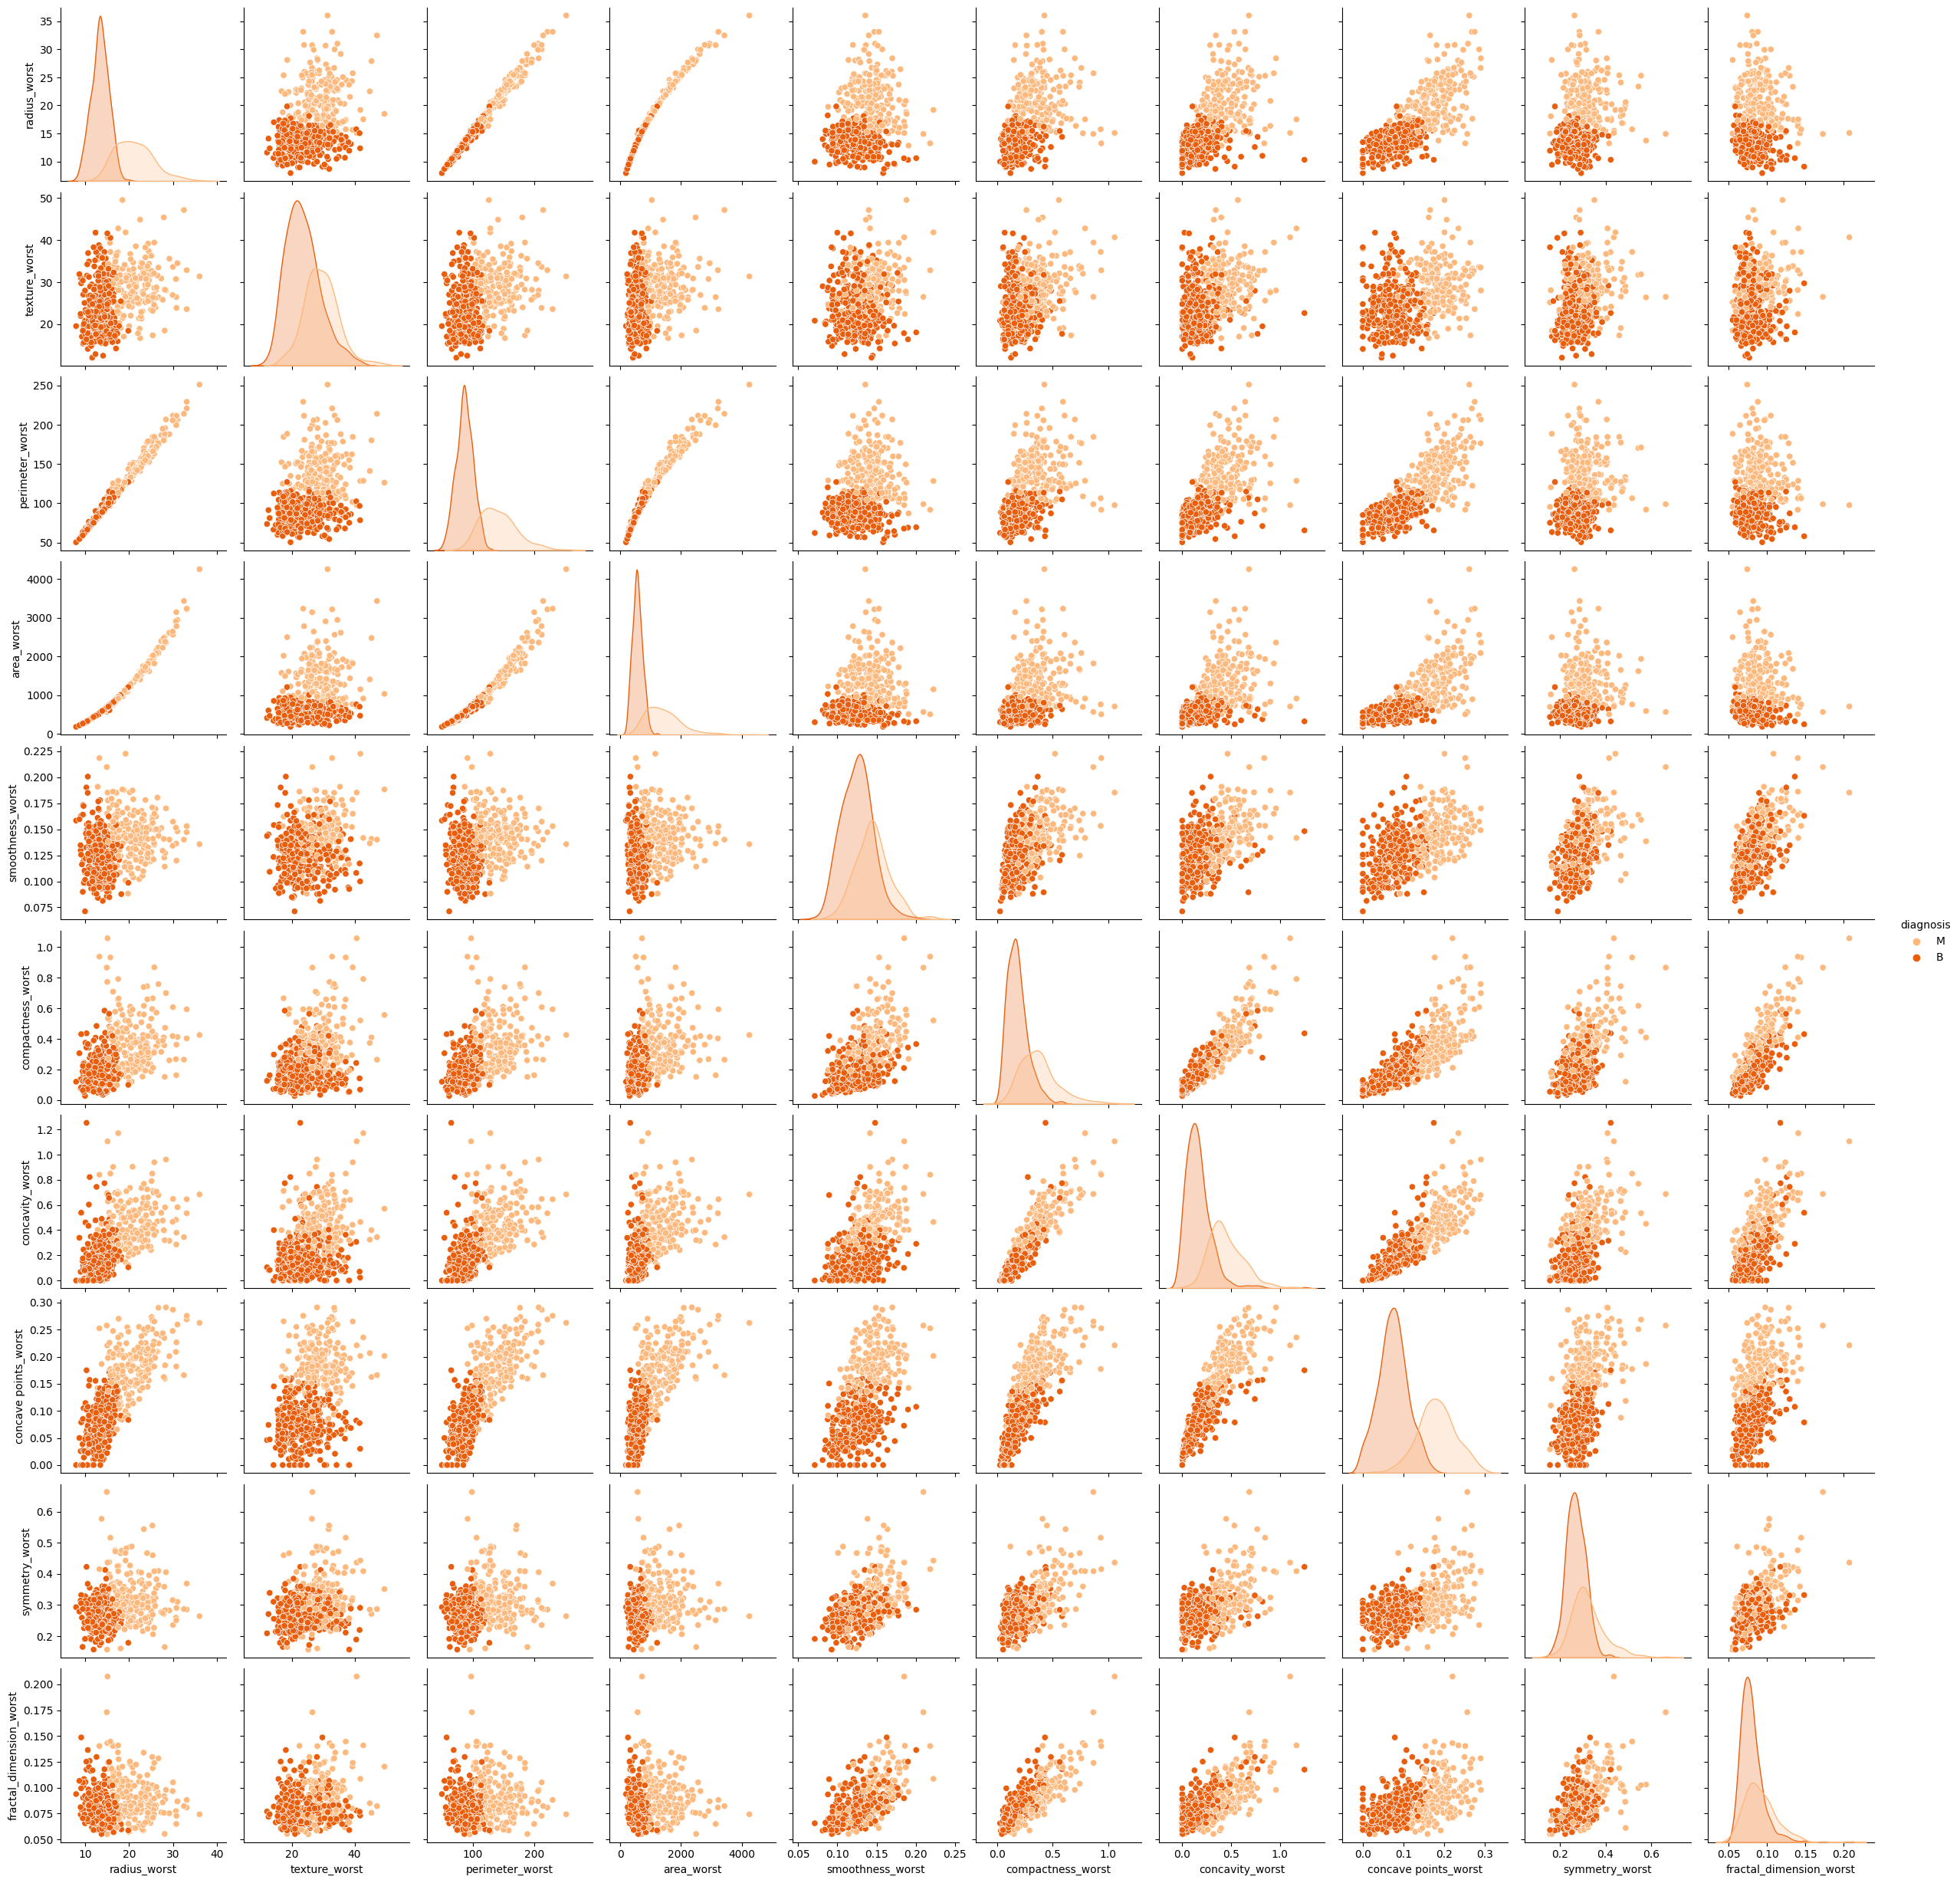

In [ ]:
# pairplot for worst columns
sns.pairplot(df[w_col],hue = 'diagnosis', palette='Oranges')

Data Preprocessing And Building Model
```



In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# mapping categorical values to numerical values
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 30)
Shape of test set: (114, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

CLASSSIFICATION MODELS

**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions1 = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.9824561403508771


K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

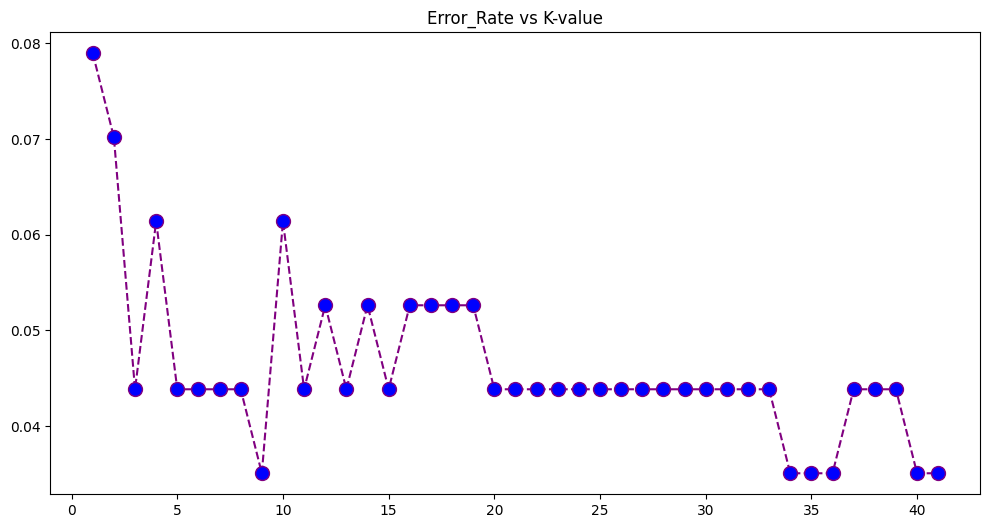

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[69  2]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
knn_model_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.9649122807017544


Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)

In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))
print("\n")
print(classification_report(y_test, predictions4))

Confusion Matrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
rfc_acc = accuracy_score(y_test, predictions4)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.9649122807017544


In [ ]:
print(logreg_acc)
print(knn_model_acc)
print(rfc_acc)

0.9824561403508771
0.9649122807017544
0.9649122807017544


The accuracy of Logistic Regression Model is 98.24%

The accuracy of KNN model is 96.49%

The accuracy of Random Forest Model is 96.49%

<Axes: >

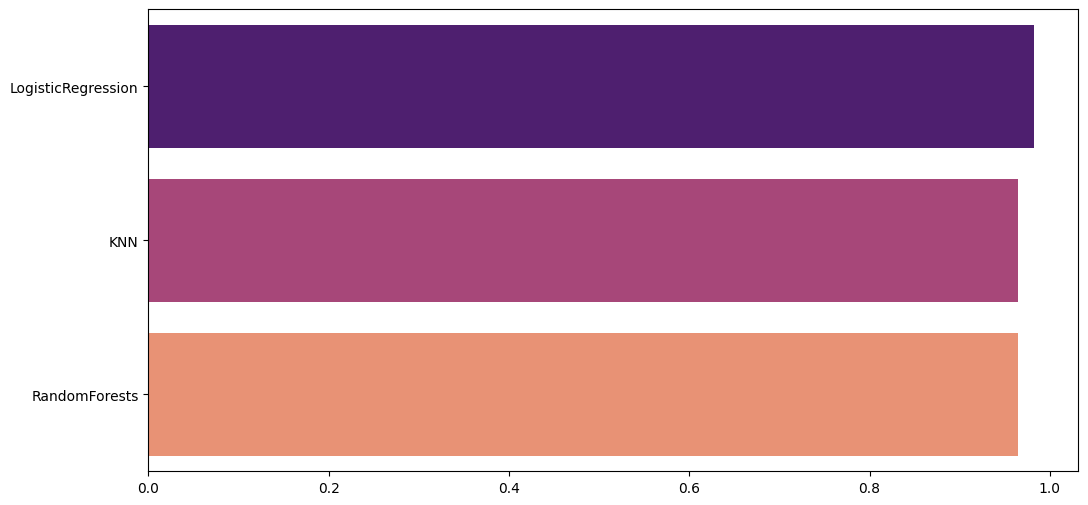

In [ ]:
plt.figure(figsize=(12,6))
model_acc = [logreg_acc, knn_model_acc, rfc_acc]
model_name = ['LogisticRegression', 'KNN', 'RandomForests']
sns.barplot(x= model_acc, y=model_name, palette='magma')

In [ ]:
import pickle

# Serialize the model to a file
with open('logreg_model.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)


In [ ]:
with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

In [ ]:
with open('rfc_model.pkl', 'wb') as model_file:
    pickle.dump(rfc, model_file)

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.6 MB/s eta 

In [ ]:
import gradio as gr
import pandas as pd
import joblib


model = joblib.load("/content/logreg_model.pkl")
# model = joblib.load("/content/knn_model.pkl")
# model = joblib.load("/content/rfc_model.pkl")


df = pd.read_csv('/content/data.csv')

input_components = []
example_inputs = {
    'radius_mean': 12.36,
    'texture_mean': 21.8,
    'perimeter_mean': 79.78,
    'area_mean': 466.1,
    'smoothness_mean': 0.08772,
    'compactness_mean': 0.09445,
    'concavity_mean': 0.06015,
    'concave points_mean': 0.03745,
    'symmetry_mean': 0.193,
    'fractal_dimension_mean': 0.06404,
    'radius_se': 0.2978,
    'texture_se': 1.502,
    'perimeter_se': 2.203,
    'area_se': 20.95,
    'smoothness_se': 0.007112,
    'compactness_se': 0.02493,
    'concavity_se': 0.02703,
    'concave points_se': 0.01293,
    'symmetry_se': 0.01958,
    'fractal_dimension_se': 0.004463,
    'radius_worst': 13.83,
    'texture_worst': 30.5,
    'perimeter_worst': 91.46,
    'area_worst': 574.7,
    'smoothness_worst': 0.1304,
    'compactness_worst': 0.2463,
    'concavity_worst': 0.2434,
    'concave points_worst': 0.1205,
    'symmetry_worst': 0.2972,
    'fractal_dimension_worst': 0.09261
}



columns_to_include = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Create slider input fields for each column
for column in columns_to_include:
    input_components.append(gr.inputs.Slider(minimum=df[column].min(), maximum=df[column].max(), label=column, default=example_inputs.get(column, 0.0)))

# Define a function to make predictions
def predict(*args):
    # Create a dictionary with user inputs
    user_input_dict = {column: value for column, value in zip(columns_to_include, args)}

    # Convert the dictionary to a DataFrame
    user_input_df = pd.DataFrame([user_input_dict])

    # Make predictions using the model
    prediction = model.predict(user_input_df)

    # Determine the result
    result = "Malignant" if prediction[0] == 1 else "Benign"

    return result

# Create a Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=input_components,
    outputs=gr.outputs.Textbox(label="Prediction")
)

# Launch the interface
iface.launch()


<ipython-input-42-515053745243>:63: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  input_components.append(gr.inputs.Slider(minimum=df[column].min(), maximum=df[column].max(), label=column, default=example_inputs.get(column, 0.0)))
<ipython-input-42-515053745243>:63: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  input_components.append(gr.inputs.Slider(minimum=df[column].min(), maximum=df[column].max(), label=column, default=example_inputs.get(column, 0.0)))
<ipython-input-42-515053745243>:85: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs=gr.outputs.Textbox(label="Prediction")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
example_inputs = {
    "Example 1":
    {
        'radius_mean' : 17.99,
        'texture_mean': 10.38,
        'perimeter_mean': 122.8,
        'area_mean': 1001,
        'smoothness_mean': 0.1184,
        'compactness_mean': 0.2776,
        'concavity_mean': 0.3001,
        'concave points_mean': 0.1471,
        'symmetry_mean': 0.2419,
        'fractal_dimension_mean': 0.07871,
        'radius_se': 1.095,
        'texture_se': 0.9053,
        'perimeter_se': 8.589,
        'area_se': 153.4,
        'smoothness_se': 0.006399,
        'compactness_se': 0.04904,
        'concavity_se': 0.05373,
        'concave points_se': 0.01587,
        'symmetry_se': 0.03003,
        'fractal_dimension_se': 0.006193,
        'radius_worst': 25.38,
        'texture_worst': 17.33,
        'perimeter_worst': 184.6,
        'area_worst': 2019,
        'smoothness_worst': 0.1622,
        'compactness_worst': 0.6656,
        'concavity_worst': 0.7119,
        'concave points_worst': 0.2654,
        'symmetry_worst': 0.4601,
        'fractal_dimension_worst': 0.1189
    },
    "Example 2":
    {
        'radius_mean': 13.03,
        'texture_mean': 18.42,
        'perimeter_mean': 82.61,
        'area_mean': 523.8,
        'smoothness_mean': 0.08983,
        'compactness_mean': 0.03766,
        'concavity_mean': 0.02562,
        'concave points_mean': 0.02923,
        'symmetry_mean': 0.1467,
        'fractal_dimension_mean': 0.05863,
        'radius_se': 0.1839,
        'texture_se': 2.342,
        'perimeter_se': 1.17,
        'area_se': 14.16,
        'smoothness_se': 0.004352,
        'compactness_se': 0.004899,
        'concavity_se': 0.01343,
        'concave points_se': 0.01164,
        'symmetry_se': 0.02671,
        'fractal_dimension_se': 0.001777,
        'radius_worst': 13.3,
        'texture_worst': 22.81,
        'perimeter_worst': 84.46,
        'area_worst': 545.9,
        'smoothness_worst': 0.09701,
        'compactness_worst': 0.04619,
        'concavity_worst': 0.04833,
        'concave points_worst': 0.05013,
        'symmetry_worst': 0.1987,
        'fractal_dimension_worst': 0.06169
    },
    "Example 3":
        {
        'radius_mean': 12.36,
        'texture_mean': 21.8,
        'perimeter_mean': 79.78,
        'area_mean': 466.1,
        'smoothness_mean': 0.08772,
        'compactness_mean': 0.09445,
        'concavity_mean': 0.06015,
        'concave points_mean': 0.03745,
        'symmetry_mean': 0.193,
        'fractal_dimension_mean': 0.06404,
        'radius_se': 0.2978,
        'texture_se': 1.502,
        'perimeter_se': 2.203,
        'area_se': 20.95,
        'smoothness_se': 0.007112,
        'compactness_se': 0.02493,
        'concavity_se': 0.02703,
        'concave points_se': 0.01293,
        'symmetry_se': 0.01958,
        'fractal_dimension_se': 0.004463,
        'radius_worst': 13.83,
        'texture_worst': 30.5,
        'perimeter_worst': 91.46,
        'area_worst': 574.7,
        'smoothness_worst': 0.1304,
        'compactness_worst': 0.2463,
        'concavity_worst': 0.2434,
        'concave points_worst': 0.1205,
        'symmetry_worst': 0.2972,
        'fractal_dimension_worst': 0.09261
    }
}


